## s2cloudless
Applying S2cloudless notebook example on data from our Satellite datathon

References:
https://github.com/sentinel-hub/sentinel2-cloud-detector/blob/master/examples/sentinel2-cloud-detector-example.ipynb
https://github.com/sentinel-hub/sentinel2-cloud-detector/issues/1
https://towardsdatascience.com/how-to-use-open-source-satellite-data-for-your-investigative-reporting-d662cb1f9f90

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import cv2

from s2cloudless import S2PixelCloudDetector, CloudMaskRequest
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [ ]:
def overlay_cloud_mask(image, mask=None, factor=1./255, figsize=(15, 15), fig=None):
    """
    Utility function for plotting RGB images with binary mask overlayed.
    """
    if fig == None:
        plt.figure(figsize=figsize)
    rgb = np.array(image)
    plt.imshow(rgb * factor)
    if mask is not None:
        cloud_image = np.zeros((mask.shape[0], mask.shape[1], 4), dtype=np.uint8)
        cloud_image[mask == 1] = np.asarray([255, 255, 0, 100], dtype=np.uint8)
        plt.imshow(cloud_image)

In [ ]:
def plot_probability_map(rgb_image, prob_map, factor=1./255, figsize=(15, 30)):
    """
    Utility function for plotting a RGB image and its cloud probability map next to each other. 
    """
    plt.figure(figsize=figsize)
    plot = plt.subplot(1, 2, 1)
    plt.imshow(rgb_image * factor)
    plot = plt.subplot(1, 2, 2)
    plot.imshow(prob_map, cmap=plt.cm.inferno)

In [ ]:
def plot_cloud_mask(mask, figsize=(15, 15), fig=None):
    """
    Utility function for plotting a binary cloud mask.
    """
    if fig == None:
        plt.figure(figsize=figsize)
    plt.imshow(mask, cmap=plt.cm.gray)

In [2]:
def plot_previews(data, dates, cols=4, figsize=(15, 15)):
    """
    Utility to plot small "true color" previews.
    """
    width = data[-1].shape[1]
    height = data[-1].shape[0]
    
    rows = data.shape[0] // cols + (1 if data.shape[0] % cols else 0)
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    for index, ax in enumerate(axs.flatten()):
        if index < data.shape[0]:
            caption = '{}: {}'.format(index, dates[index].strftime('%Y-%m-%d'))
            ax.set_axis_off()
            ax.imshow(data[index] / 255., vmin=0.0, vmax=1.0)
            ax.text(0, -2, caption, fontsize=12, color='g')
        else:
            ax.set_axis_off()

In [3]:
os.chdir("/home/brendan/phase-01/data/sentinel-2a-tile-7680x-10240y/timeseries/")

In [23]:
arr = glob.glob('*-*-TCI*.png')
arr.sort()
arr = arr[0:4]
arr

['7680-10240-TCI-2016-12-22.png',
 '7680-10240-TCI-2017-01-01.png',
 '7680-10240-TCI-2017-01-11.png',
 '7680-10240-TCI-2017-02-10.png']

In [24]:
imgs = [cv2.imread(x) for x in arr]


In [25]:
dates = [datetime.strptime(x[-14:-4], '%Y-%m-%d') for x in arr]

In [26]:
arr[0:4]

['7680-10240-TCI-2016-12-22.png',
 '7680-10240-TCI-2017-01-01.png',
 '7680-10240-TCI-2017-01-11.png',
 '7680-10240-TCI-2017-02-10.png']

In [34]:
np.asarray(imgs)[-1]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 98,  74,  54],
        [ 98,  76,  54],
        [104,  82,  57]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 90,  67,  48],
        [ 92,  70,  49],
        [ 95,  71,  46]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 82,  65,  48],
        [ 84,  65,  46],
        [ 84,  62,  44]],

       ...,

       [[ 68,  60,  39],
        [ 69,  62,  39],
        [ 69,  62,  40],
        ...,
        [ 77,  73,  51],
        [ 75,  72,  47],
        [ 74,  70,  44]],

       [[ 68,  60,  39],
        [ 68,  62,  38],
        [ 68,  58,  38],
        ...,
        [ 72,  69,  44],
        [ 73,  71,  43],
        [ 74,  70,  42]],

       [[ 69,  63,  37],
        [ 69,  65,  40],
        [ 68,  60,  38],
        ...,
        [ 73,  72,  44],
        [ 75,  73,  45],
        [ 75,  71,  43]]

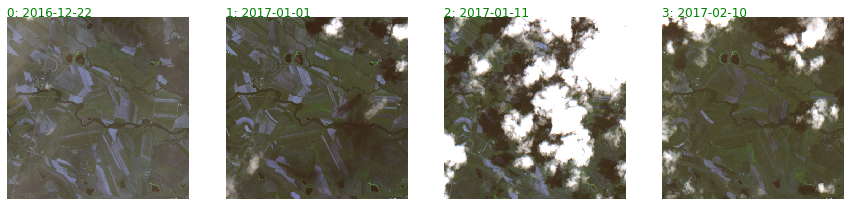

In [30]:
plot_previews(np.asarray(imgs), dates, cols=4, figsize=(15, 10))


In [31]:
cloud_detector = S2PixelCloudDetector(threshold=0.4, average_over=4, dilation_size=2)

In [32]:
#!ls

7680-10240-B01-2016-12-22.png  7680-10240-B08-2016-12-22.png
7680-10240-B01-2017-01-01.png  7680-10240-B08-2017-01-01.png
7680-10240-B01-2017-01-11.png  7680-10240-B08-2017-01-11.png
7680-10240-B01-2017-02-10.png  7680-10240-B08-2017-02-10.png
7680-10240-B01-2017-02-20.png  7680-10240-B08-2017-02-20.png
7680-10240-B01-2017-03-02.png  7680-10240-B08-2017-03-02.png
7680-10240-B01-2017-03-12.png  7680-10240-B08-2017-03-12.png
7680-10240-B01-2017-04-01.png  7680-10240-B08-2017-04-01.png
7680-10240-B01-2017-04-11.png  7680-10240-B08-2017-04-11.png
7680-10240-B01-2017-05-01.png  7680-10240-B08-2017-05-01.png
7680-10240-B01-2017-05-11.png  7680-10240-B08-2017-05-11.png
7680-10240-B01-2017-05-21.png  7680-10240-B08-2017-05-21.png
7680-10240-B01-2017-05-31.png  7680-10240-B08-2017-05-31.png
7680-10240-B01-2017-06-20.png  7680-10240-B08-2017-06-20.png
7680-10240-B01-2017-07-10.png  7680-10240-B08-2017-07-10.png
7680-10240-B01-2017-07-20.png  7680-10240-B08-2017-07-20.png
7680-10240-B01-2017-07-3

In [ ]:
from s2cloudless import S2PixelCloudDetector
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling



with rasterio.open("/data/test/T32VNJ_20170403T104021_B01.jp2") as scl:
    B01=scl.read()
    tmparr = np.empty_like(B01)
    aff = scl.transform
    print(B01.shape)
    
with rasterio.open("/data/test/T32VNJ_20170403T104021_B02.jp2") as scl:
    B02=scl.read()    
    reproject(
        B02, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B02 = tmparr
    print(B02.shape)

with rasterio.open("/data/test/T32VNJ_20170403T104021_B04.jp2") as scl:
    B04=scl.read()
    reproject(
        B04, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B04 = tmparr
    print(B04.shape)
with rasterio.open("/data/test/T32VNJ_20170403T104021_B05.jp2") as scl:
    B05=scl.read()
    reproject(
        B05, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B05 = tmparr
    print(B05.shape)
with rasterio.open("/data/test/T32VNJ_20170403T104021_B08.jp2") as scl:
    B08=scl.read()
    reproject(
        B08, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B08 = tmparr
    print(B08.shape)
    
with rasterio.open("/data/test/T32VNJ_20170403T104021_B8A.jp2") as scl:
    B8A=scl.read()
    reproject(
        B8A, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B8A = tmparr
    print(B8A.shape)
with rasterio.open("/data/test/T32VNJ_20170403T104021_B09.jp2") as scl:
    B09=scl.read()
with rasterio.open("/data/test/T32VNJ_20170403T104021_B10.jp2") as scl:
    B10=scl.read()
with rasterio.open("/data/test/T32VNJ_20170403T104021_B11.jp2") as scl:
    B11=scl.read()
    reproject(
        B11, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B11 = tmparr
    print(B11.shape)
with rasterio.open("/data/test/T32VNJ_20170403T104021_B12.jp2") as scl:
    B12=scl.read()
    reproject(
        B12, tmparr,
        src_transform = scl.transform,
        dst_transform = aff,
        src_crs = scl.crs,
        dst_crs = scl.crs,
        resampling = Resampling.bilinear)
    B12 = tmparr
    print(B12.shape)

print(B12.shape)
bands = np.array([np.dstack((B01[0]/10000.0,B02[0]/10000.0,B04[0]/10000.0,B05[0]/10000.0,B08[0]/10000.0,B8A[0]/10000.0,B09[0]/10000.0,B10[0]/10000.0,B11[0]/10000.0,B12[0]/10000.0))])
print(bands.shape)
cloud_detector = S2PixelCloudDetector(threshold=0.4, average_over=4, dilation_size=2)
cloud_probs = cloud_detector.get_cloud_probability_maps(bands)
mask = cloud_detector.get_cloud_masks(bands).astype(rasterio.uint8)

with rasterio.open("/data/test/clouds.tif", "w",  driver='GTiff',compress="lzw",height=mask.shape[1],width=mask.shape[2],count=1,dtype=rasterio.uint8) as dest:
    dest.write(mask)
with rasterio.open("/data/test/clouds_prob.tif", "w",  driver='GTiff',compress="lzw",height=cloud_probs.shape[1],width=cloud_probs.shape[2],count=1,dtype=cloud_probs.dtype) as dest:
    dest.write(cloud_probs)